<a href="https://colab.research.google.com/github/CarlosRochaCx/MNA/blob/main/MNA_IAyAA_Actividad_Pronosticos_Series_de_Tiempo_ver2_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial y Aprendizaje Automático**
## **Maestría en Inteligencia Artificial Aplicada**
### **Dr Luis Eduardo Falcón Morales**
### **Tecnológico de Monterrey**
## **Actividad Individual Semana 9: Pronósticos con Series de Tiempo**


#### **Nombre:** Carlos Alberto Rocha Chávez
#### **Matrícula:** A01796914

Modelos para predicción de un problema de serie de tiempo:

* **1. Modelo ingenuo**
* **2. Modelo ARIMA**
* **3. Modelo Prophet**
* **4. Modelo LSTM**

#### **Exploración de datos**

In [192]:
## ++++++++++ Incluye todas las celdas y líneas de código que requieras +++++++++++++++++++++++++

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from prophet import Prophet

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense

import warnings
warnings.filterwarnings("ignore")

In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MNA - Maestría en Inteligencia Artificial Aplicada/Inteligencia Artificial y Aprendizaje Automático/Tareas/Actividad Semana 9/monthly_champagne_sales.csv")

df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [196]:
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

df.head()

,ds,y
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      105 non-null    datetime64[ns]
 1   y       105 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [198]:
df_temp = df.copy()
df_temp.set_index('ds', inplace=True)
df_temp

,y
ds,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [199]:
print(df.shape)
print(df_temp.shape)

(105, 2)
(105, 1)


In [200]:
df_temp.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='ds', length=105, freq=None)

In [201]:
df_temp.index.freq = 'MS'
df_temp.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='ds', length=105, freq='MS')

In [202]:
train = df_temp.iloc[0:-12,:]
test = df_temp.iloc[-12:,:]

In [203]:
train.shape

(93, 1)

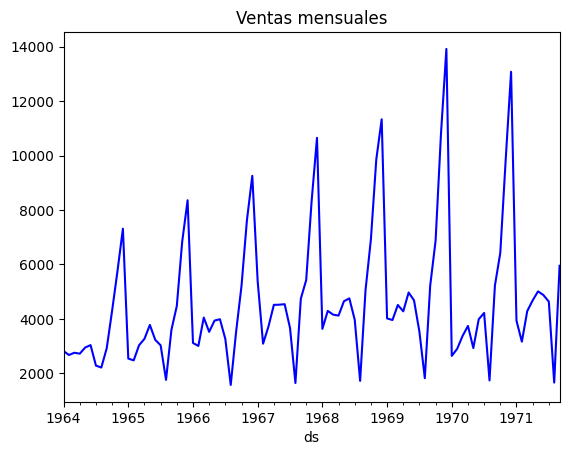

In [204]:
train['y'].plot(title='Ventas mensuales', style='-b')
plt.show()

#### **Modelo Ingenuo**

In [205]:
test['y'].values

array([ 6981,  9851, 12670,  4348,  3564,  4577,  4788,  4618,  5312,
        4298,  1413,  5877])

In [206]:
history = [x for x in train['y'].values]
predictions = list()

for i in range(len(test['y'])):
  yhat = history[-1]
  predictions.append(yhat)

  obs = test.iloc[i]['y']
  history.append(obs)
  print('>Esperado-real = %3d, Predicción = %.3f' % (obs, yhat))

rmse = np.sqrt(mean_squared_error(test['y'].values, predictions))
naive_rmse = rmse
print('\nError-Modelo-Naive: RMSE: %.3f' % rmse)

>Esperado-real = 6981, Predicción = 5951.000
>Esperado-real = 9851, Predicción = 6981.000
>Esperado-real = 12670, Predicción = 9851.000
>Esperado-real = 4348, Predicción = 12670.000
>Esperado-real = 3564, Predicción = 4348.000
>Esperado-real = 4577, Predicción = 3564.000
>Esperado-real = 4788, Predicción = 4577.000
>Esperado-real = 4618, Predicción = 4788.000
>Esperado-real = 5312, Predicción = 4618.000
>Esperado-real = 4298, Predicción = 5312.000
>Esperado-real = 1413, Predicción = 4298.000
>Esperado-real = 5877, Predicción = 1413.000

Error-Modelo-Naive: RMSE: 3135.480


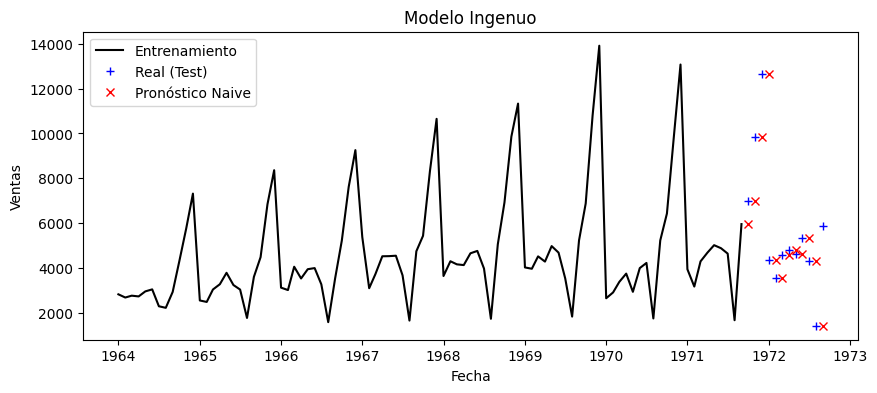

In [207]:
plt.figure(figsize=(10, 4))
plt.plot(train['y'], '-k', label='Entrenamiento')
plt.plot(test['y'], '+b', label='Real (Test)')
plt.plot(test.index, predictions, 'xr', label='Pronóstico Naive')
plt.title('Modelo Ingenuo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

#### **Modelo ARIMA**

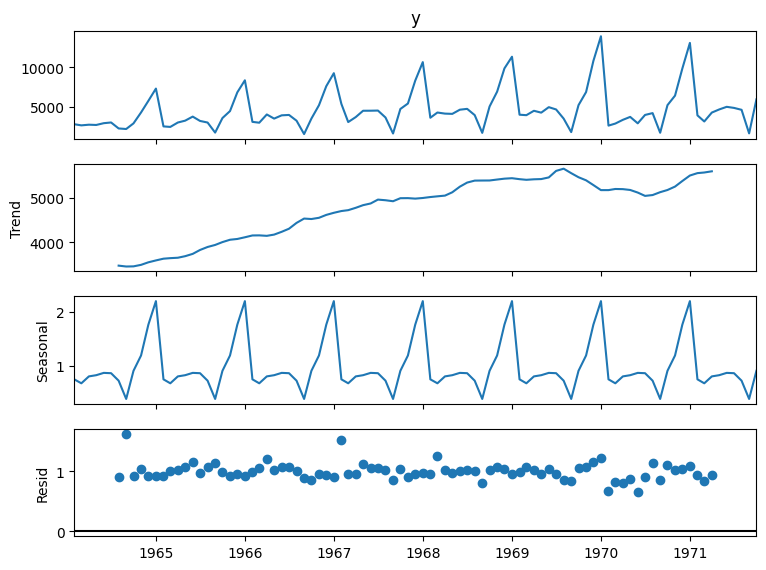

In [208]:
decomposition = seasonal_decompose(train['y'].resample('M').mean(), model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(8,6)
plt.show()

**Gráfica para detección de estacionalidad mensual**


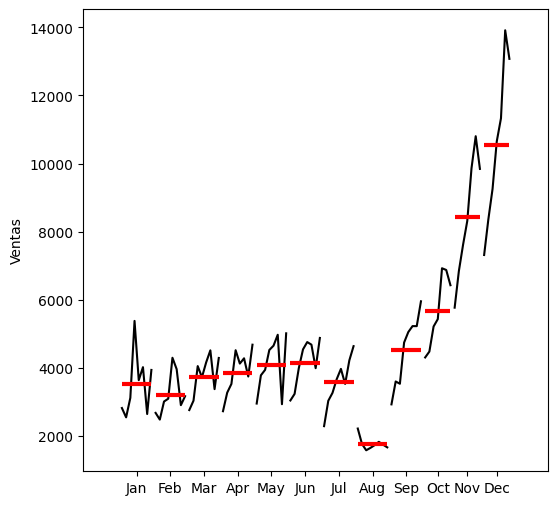

In [209]:
fig = month_plot(train['y'].resample('M').mean(), ylabel='Ventas')
fig.set_size_inches(6,6)
plt.show()

**Gráfica para detección de estacionalidad trimestral**

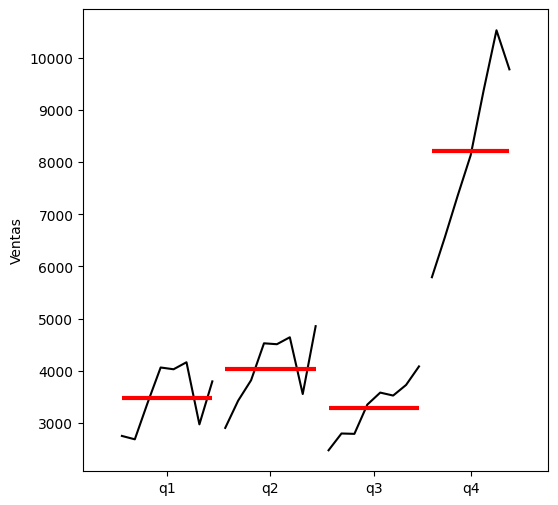

In [210]:
fig = quarter_plot(train['y'].resample('Q').mean(), ylabel='Ventas')
fig.set_size_inches(6,6)
plt.show()

**Gráficos de Autocorrelación (ACF) y Autocorrelación Parcial (PACF)**

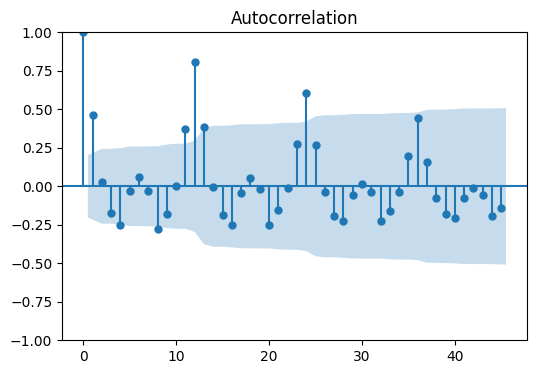

In [211]:
fig,ax = plt.subplots(figsize = (6,4))
plot_acf(train['y'], lags=45, ax=ax)
plt.show()

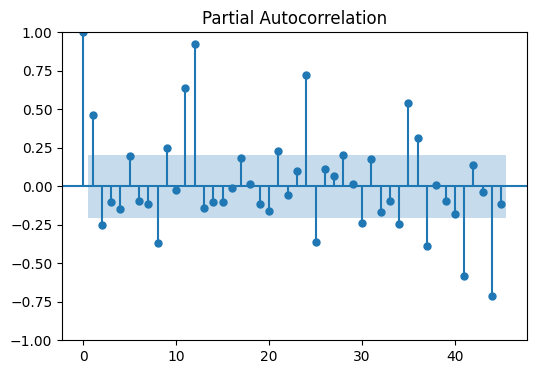

In [212]:
fig, ax = plt.subplots(figsize = (6,4))
plot_pacf(train['y'], lags = 45, ax = ax, method="ols")
plt.show()

In [213]:
def difference(dataset, interval=1):
  diff = list()

  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)

  return np.array(diff)

def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]

In [214]:
history = [x for x in train.loc[:,'y'].values]

predictions = list()

for i in range(len(test['y'])):
  #
  months_in_year = 12
  diff = difference(history, months_in_year)

  model = ARIMA(diff, order=(3,0,13),)
  model_fit = model.fit(method_kwargs={'maxiter':300})

  yhat = model_fit.forecast()[0]
  yhat = inverse_difference(history, yhat, months_in_year)

  predictions.append(yhat)

  obs = test.iloc[i]['y']
  history.append(obs)

  print('>Esperado-real = %3d, Predicción = %.3f' % (obs, yhat))

rmse = np.sqrt(mean_squared_error(test['y'].values, predictions))
arima_rmse = rmse
print('\nError-Modelo-ARIMA: RMSE: %.3f' % rmse)

>Esperado-real = 6981, Predicción = 6726.531
>Esperado-real = 9851, Predicción = 9898.715
>Esperado-real = 12670, Predicción = 13641.247
>Esperado-real = 4348, Predicción = 4083.349
>Esperado-real = 3564, Predicción = 3728.547
>Esperado-real = 4577, Predicción = 4256.122
>Esperado-real = 4788, Predicción = 5060.375
>Esperado-real = 4618, Predicción = 5300.950
>Esperado-real = 5312, Predicción = 5045.039
>Esperado-real = 4298, Predicción = 4981.132
>Esperado-real = 1413, Predicción = 1692.169
>Esperado-real = 5877, Predicción = 5846.067

Error-Modelo-ARIMA: RMSE: 444.210


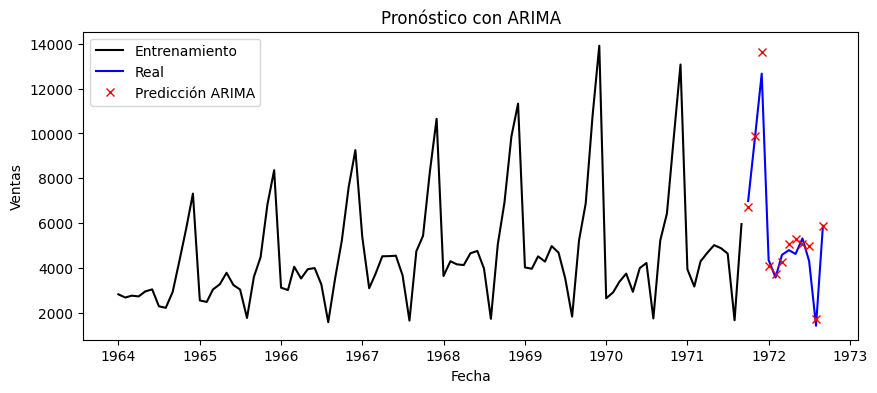

In [215]:
plt.figure(figsize=(10, 4))
plt.plot(train['y'], '-k', label='Entrenamiento')
plt.plot(test['y'], '-b', label='Real')
plt.plot(test.index, predictions, 'xr', label='Predicción ARIMA')
plt.title('Pronóstico con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

#### **Modelo Prophet**

In [216]:
train = df.iloc[0:-12,:]
test = df.iloc[-12:,:]

In [217]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=True,
                changepoint_prior_scale=10.,
                seasonality_prior_scale=18)
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7h1azvp/a80sjw_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7h1azvp/jzf05wvg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46936', 'data', 'file=/tmp/tmpq7h1azvp/a80sjw_n.json', 'init=/tmp/tmpq7h1azvp/jzf05wvg.json', 'output', 'file=/tmp/tmpq7h1azvp/prophet_model5accxcak/prophet_model-20250620201916.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:19:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:19:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [218]:
pred_FP = model.predict(test)['yhat']
rmse = np.sqrt(mean_squared_error(test['y'], pred_FP))
prophet_rmse = rmse
print('\nError-Modelo-FacebookProphet: RMSE: %.3f' % rmse)


Error-Modelo-FacebookProphet: RMSE: 1322.266


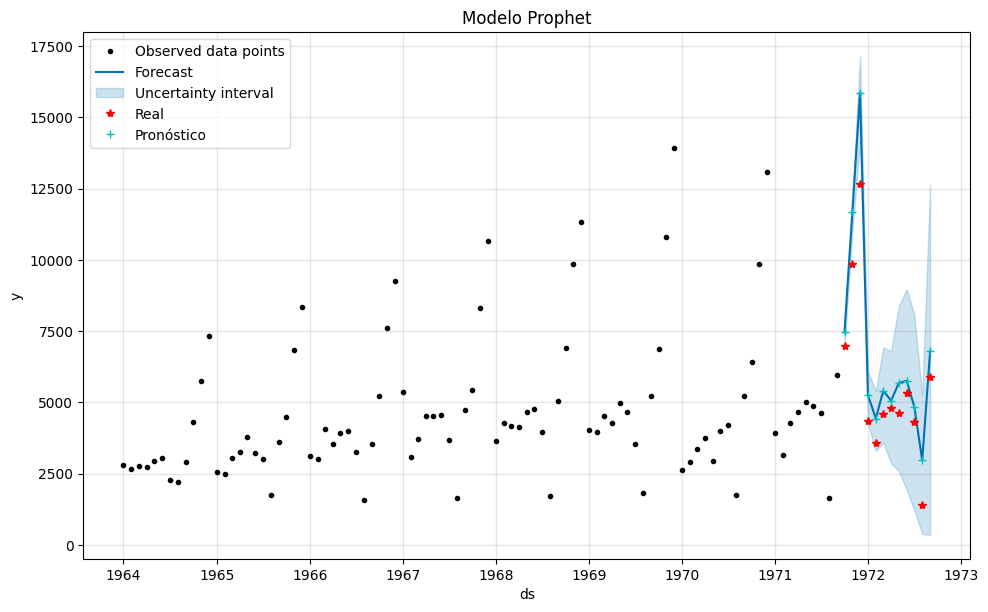

In [219]:
forecast = model.predict(test)

fig = model.plot(forecast)
plt.plot(test['ds'], test['y'], '*r', label='Real')
plt.plot(test['ds'], forecast['yhat'], '+c', label='Pronóstico')
plt.legend()
plt.title("Modelo Prophet")
plt.show()

####**Modelo LSTM**

In [220]:
def creamos_secuencias(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [221]:
window_size = 12

X, y = creamos_secuencias(df_temp[['y']].values, window_size)

print(X.shape)

(93, 12, 1)


In [222]:
split = int(0.85 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(X_train.shape)
print(X_test.shape)

(79, 12, 1)
(14, 12, 1)


In [223]:
model = Sequential()
model.add(LSTM(50,
               return_sequences=True,
               activation='relu',
               recurrent_activation='sigmoid'
               ))
model.add(LSTM(50, return_sequences=False, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError()],
              )

history = model.fit(X_train, y_train, epochs=65, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - loss: 39520808.0000 - root_mean_squared_error: 6285.4150 - val_loss: 43718152.0000 - val_root_mean_squared_error: 6611.9702
Epoch 2/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 30236294.0000 - root_mean_squared_error: 5491.4990 - val_loss: 43686116.0000 - val_root_mean_squared_error: 6609.5474
Epoch 3/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 32838796.0000 - root_mean_squared_error: 5728.4966 - val_loss: 43423688.0000 - val_root_mean_squared_error: 6589.6650
Epoch 4/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 30134102.0000 - root_mean_squared_error: 5486.0391 - val_loss: 32282016.0000 - val_root_mean_squared_error: 5681.7266
Epoch 5/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 27951736.0000 - root_mean_squared_error: 5285.7983 - val_loss: 32071580.0000 - val_root_mean_squared_error: 5663.1777
Epoch 6/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 26340644.0000 - root_mean_squared_error: 5131.9727 - val_loss: 3246

In [224]:
pred_scaled = model.predict(X_test[-12:])
y_test_real_scaled = y_test[-12:].reshape(-1, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


In [225]:
pred_LSTM = model.predict(X_test[-12:])
y_test_real = y_test[-12:].reshape(-1, 1)

rmse = np.sqrt(mean_squared_error(y_test_real, pred_LSTM))
lstm_rmse = rmse
print('\nError-Modelo-LSTM: RMSE: %.3f' % rmse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Error-Modelo-LSTM: RMSE: 2203.134


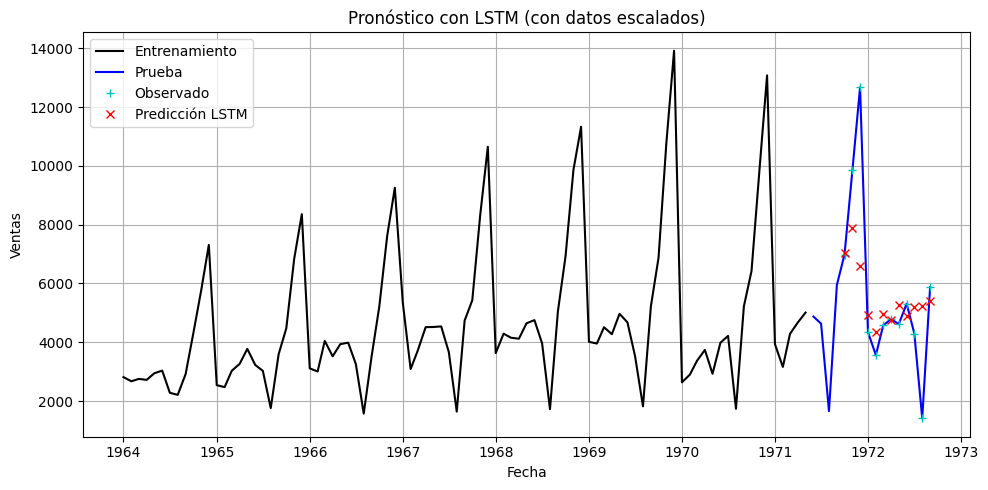

In [226]:
plt.figure(figsize=(10, 5))
plt.plot(df['ds'][0:int(0.85 * len(df))], df['y'][0:int(0.85 * len(df))], '-k', label='Entrenamiento')
plt.plot(df['ds'][int(0.85 * len(df)):], df['y'][int(0.85 * len(df)):], '-b', label='Prueba')
plt.plot(df['ds'][-12:], df['y'][-12:], '+c', label='Observado')
plt.plot(df['ds'][-12:], pred_LSTM, 'xr', label='Predicción LSTM')
plt.title('Pronóstico con LSTM (con datos escalados)')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Conclusión**


Tabla comparativa de RMSE:
    Modelo         RMSE
0    ARIMA   444.209738
1  Prophet  1322.266200
2     LSTM  2203.133564
3    Naive  3135.480346


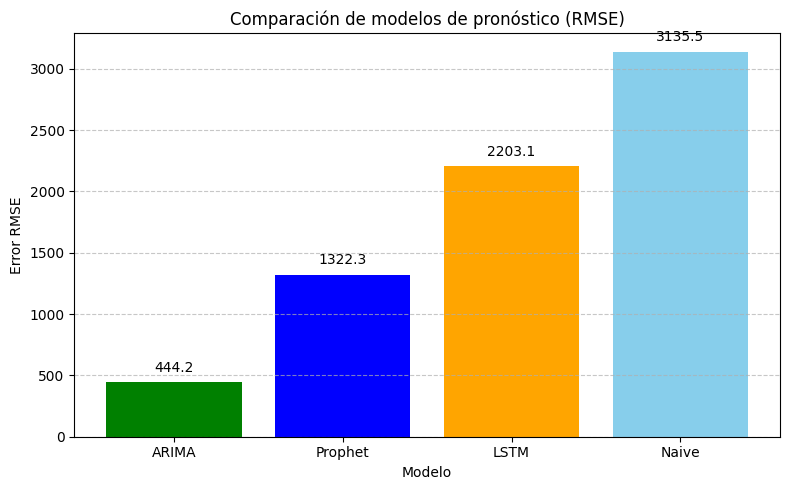

In [227]:
resultados = pd.DataFrame({
    'Modelo': ['ARIMA', 'Prophet', 'LSTM', 'Naive'],
    'RMSE': [arima_rmse, prophet_rmse, lstm_rmse, naive_rmse]
})

print("\nTabla comparativa de RMSE:")
print(resultados.sort_values(by='RMSE'))

plt.figure(figsize=(8,5))
bars = plt.bar(resultados['Modelo'], resultados['RMSE'], color=['green', 'blue', 'orange', 'skyblue'])
plt.title('Comparación de modelos de pronóstico (RMSE)')
plt.xlabel('Modelo')
plt.ylabel('Error RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(resultados['RMSE'])*0.02,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

En esta actividad trabajamos con datos reales de ventas mensuales de champaña para crear modelos que nos ayudaran a predecir las ventas del futuro. Usamos cuatro métodos diferentes: el modelo ingenuo (Naive), ARIMA, Prophet y LSTM. Esta tarea es un buen ejemplo de cómo la inteligencia artificial puede apoyar decisiones importantes en las empresas, como saber cuánto producto producir o cuánto stock tener.

Cada modelo tiene sus ventajas y desventajas. El modelo Naive, que simplemente repite el último valor conocido, fue el más fácil de usar, pero también el menos preciso, con un error (RMSE) de 3135.48. Aun así, sirve como punto de comparación para ver si los otros modelos realmente mejoran las predicciones.

El modelo ARIMA fue el más acertado, con un error muy bajo de 444.21. Este modelo estadístico pudo detectar bien los patrones mensuales y hacer buenas predicciones. Por eso, es una excelente opción cuando se tienen datos con cierta regularidad y estructura.

El modelo Prophet, creado por Facebook, logró un buen resultado con un error de 1322.27. Es fácil de usar y se adapta bien a datos que cambian con el tiempo o que tienen estacionalidad, como las ventas mensuales. Aunque no fue tan preciso como ARIMA, es una buena opción cuando se busca rapidez y simplicidad.

El modelo LSTM, una red neuronal pensada para trabajar con datos secuenciales, obtuvo un error de 2203.13. Aunque tiene mucho potencial, en este caso no funcionó tan bien, probablemente porque los datos eran pocos y porque necesita configurarse con más cuidado para dar buenos resultados.

En resumen, el modelo ARIMA fue el que mejor funcionó, aunque todos los modelos nos ayudaron a entender mejor el comportamiento de los datos. Este ejercicio fue muy útil porque nos permitió comparar diferentes métodos y ver cuál se adapta mejor a un problema real. Además, fue una forma práctica y clara de aplicar los conceptos de predicción con inteligencia artificial en un caso real de negocio.

## **<<< Fin de la Actividad de la Semana - Pronósticos y Series de Tiempo >>>**